In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r'C:\Users\bilal\Downloads\product_sales.csv')


##  Data Validation

In [ ]:
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [ ]:
#total rows
total_rows = df.shape[0]
total_rows


15000

In [ ]:
#total columns
total_columns = df.shape[1]
total_columns

8

In [ ]:
# To check unique values
for column in df.columns:
    print(column, df[column].nunique())

# To check missing values
print("Missing values in each column below")
print(df.isnull().sum())


week 6
sales_method 5
customer_id 15000
nb_sold 10
revenue 6743
years_as_customer 42
nb_site_visits 27
state 50
Missing values in each column below
week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64


In [ ]:
#checking week column
print(sorted(df["week"].unique()))

[1, 2, 3, 4, 5, 6]


In [ ]:
#checking sales_method column
print(sorted(df["sales_method"].unique()))


['Call', 'Email', 'Email + Call', 'em + call', 'email']


In [ ]:
# email and Email are same and "em + call" and "email + call" are same
df["sales_method"] = df["sales_method"].replace("em + call", "Email + Call")
df["sales_method"] = df["sales_method"].str.replace("email", "Email")
# and checking again
print(df["sales_method"].unique())


['Email' 'Email + Call' 'Call']


In [ ]:
# Total number of customer_id
total_customers = len(df["customer_id"])

# Number of unique customer_id
unique_customers = df["customer_id"].nunique()

# Data type of customer_id
customer_id_dtype = df["customer_id"].dtype

print("Total number of customer_id: ", total_customers)
print("Number of unique customer_id: ", unique_customers)
print("Data type of customer_id: ", customer_id_dtype)


Total number of customer_id:  15000
Number of unique customer_id:  15000
Data type of customer_id:  object


In [ ]:
#checking nb_sold column
print(sorted(df["nb_sold"].unique()))
nb_sold_dtype = df["nb_sold"].dtype
print("Data type of nb_sold: ", nb_sold_dtype)



[7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Data type of nb_sold:  int64


In [ ]:
#it should be in integer
# Convert customer_id column to int64 data type
df["nb_sold"] = df["nb_sold"].astype("int64")
nb_sold_dtype = df["nb_sold"].dtype
print("Data type of nb_sold: ", nb_sold_dtype)
print(sorted(df["nb_sold"].unique()))




Data type of nb_sold:  int64
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [ ]:
revenue_dtype = df["revenue"].dtype
print("Data type of revenue: ", revenue_dtype)


Data type of revenue:  float64


In [ ]:
null_revenue = df[df['revenue'].isnull()]
null_revenue


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
16,2,Email,0f744f79-1588-4e0c-8865-fdaecc7f6dd4,10,NaN,6,30,Pennsylvania
17,6,Email + Call,d10690f0-6f63-409f-a1da-8ab0e5388390,15,NaN,0,24,Wisconsin
28,5,Email,f64f8fd5-e9b7-4326-9f5d-ef283f14d7ad,12,NaN,4,32,Florida
...,...,...,...,...,...,...,...,...
14951,5,Call,5f1c099a-3cf2-4c32-91f0-5ec802926073,10,NaN,10,25,Virginia
14957,1,Call,b7947946-8b0a-4031-8835-226200f260a5,7,NaN,5,23,Illinois
14970,4,Email + Call,72be03aa-25b1-4574-b358-74118cd8d81a,12,NaN,12,25,Washington
14992,5,Email + Call,cd9e6945-ae21-4bed-a6cf-f0302e6c4795,12,NaN,1,34,New York


In [ ]:
null_rows = df[df['nb_sold'] == 0]
null_rows


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


In [ ]:
# So there are no values where revenue was 0 because the customer didnt bought instead it is missing values as all of it has nb_sold oin them
df = df.drop(df[df['revenue'].isna()].index)
# Total number of revenue
total_revenue = len(df["revenue"])

# Number of unique revenuerevenue
unique_revenue = df["revenue"].nunique()

print("Total number of revenue: ", total_revenue)
print("Number of unique revenue: ", unique_revenue)

Total number of revenue:  13926
Number of unique revenue:  6743


In [ ]:
#counting number of rows now
#total rows
total_rows = df.shape[0]
total_rows


13926

In [ ]:
years_as_customer_dtype = df["years_as_customer"].dtype
print("Data type of years_as_customer: ", years_as_customer_dtype)

print(sorted(df["years_as_customer"].unique()))


Data type of years_as_customer:  int64
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 47, 63]


In [ ]:
# Remove rows where years_as_customer is greater than 38 in the original DataFrame
df.drop(df[df["years_as_customer"] > 38].index, inplace=True)
print(sorted(df["years_as_customer"].unique()))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]


In [ ]:
#counting number of rows now
#total rows
total_rows = df.shape[0]
total_rows


13922

In [ ]:
nb_site_visits_dtype = df["nb_site_visits"].dtype
print("Data type of nb_site_visits: ",nb_site_visits_dtype)
print(sorted(df["nb_site_visits"].unique()))
print(df["nb_site_visits"].nunique())


Data type of nb_site_visits:  int64
[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
26


In [ ]:
state_dtype = df["state"].dtype
print("Data type of state: ", state_dtype)
print(sorted(df["state"].unique()))
print(df["state"].nunique())


Data type of state:  object
['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
50


In [ ]:
# Check the total number of rows and columns in the DataFrame after cleaning
num_rows, num_cols = df.shape
print("Number of rows: ", num_rows)
print("Number of columns: ", num_cols)


Number of rows:  13922
Number of columns:  8


## Data Visualisation

In [ ]:
## Statistical Analysis of the Data
# calculate the mean of each numerical feature
mean_week = df['week'].mean()
mean_nb_sold = df['nb_sold'].mean()
mean_revenue = df['revenue'].mean()
mean_years_as_customer = df['years_as_customer'].mean()
mean_nb_site_visits = df['nb_site_visits'].mean()

# calculate the mode of the sales_method and state features
mode_sales_method = df['sales_method'].mode()[0]
mode_state = df['state'].mode()[0]

# calculate the count of unique customer_id
unique_customer_count = df['customer_id'].nunique()

# print the results
print("Mean week:", mean_week)
print("Mean number sold:", mean_nb_sold)
print("Mean revenue:", mean_revenue)
print("Mean years as customer:", mean_years_as_customer)
print("Mean number of site visits:", mean_nb_site_visits)
print("Mode of sales method:", mode_sales_method)
print("Mode of state:", mode_state)
print("Number of unique customers:", unique_customer_count)


Mean week: 3.078508834937509
Mean number sold: 10.0401522769717
Mean revenue: 93.93789829047542
Mean years as customer: 4.966886941531389
Mean number of site visits: 24.9471340324666
Mode of sales method: Email
Mode of state: California
Number of unique customers: 13922


### week

In [ ]:
# Create histogram of "week"
plt.hist(df['week'], bins=10)

# Add labels and title
plt.xlabel('Week')
plt.ylabel('Frequency')
plt.title('Distribution of Weeks')

# Display plot
plt.show()

This histogram represents the distribution of weeks in the dataset. The x-axis shows the different weeks in the dataset, while the y-axis shows the frequency of each week. The histogram provides an overview of the distribution of weeks in the dataset, allowing you to identify any patterns or trends over time.

### Sales method

In [ ]:
# Create bar chart of "sales_method"
sales_methods = df['sales_method'].value_counts().index.tolist()
counts = df['sales_method'].value_counts().tolist()
plt.bar(sales_methods, counts)

# Add labels and title
plt.xlabel('Sales Method')
plt.ylabel('Customer Count')
plt.title('Count of Customers per Sales Method')

# Display plot
plt.show()

This bar chart represents the count of customers for each sales method. The x-axis shows the different sales methods, while the y-axis shows the count of customers. The bar chart provides an overview of the distribution of customers across different sales methods, allowing you to identify the most effective sales method.

### nb_sold - Histogram

In [ ]:
# Create histogram of "nb_sold"
plt.hist(df['nb_sold'], bins=10)

# Add labels and title
plt.xlabel('Number of Products Sold')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Products Sold')

# Display plot
plt.show()


This histogram represents the distribution of the number of products sold. The x-axis shows the different number of products sold, while the y-axis shows the frequency of each number. The histogram provides an overview of the distribution of the number of products sold, allowing you to understand the spread of the data and identify any outliers.

### revenue - Box Plot

In [ ]:
# Create box plot of "revenue"
plt.boxplot(df['revenue'])

# Add labels and title
plt.ylabel('Revenue')
plt.title('Distribution of Revenue')

# Display plot
plt.show()


This box plot represents the distribution of revenue. The box represents the middle 50% of the data, while the whiskers represent the rest of the data. The box plot provides an overview of the distribution of revenue, allowing you to understand the spread of the data and identify any outliers.

### years_as_customer - Histogram

In [ ]:
# Create histogram of "years_as_customer"
plt.hist(df['years_as_customer'], bins=10)

# Add labels and title
plt.xlabel('Years as Customer')
plt.ylabel('Frequency')
plt.title('Distribution of Years as Customer')

# Display plot
plt.show()

This histogram represents the distribution of the number of years each customer has been with the company. The x-axis shows the different number of years, while the y-axis shows the frequency of each number. The histogram provides an overview of the distribution of years as a customer, allowing you to understand the distribution of customer loyalty and identify any trends.

### nb_site_visits - Box Plot

In [ ]:
# Create box plot of "nb_site_visits"
plt.boxplot(df['nb_site_visits'])

# Add labels and title
plt.ylabel('Number of Site Visits')
plt.title('Distribution of Site Visits')

# Display plot
plt.show()

This box plot represents the distribution of the number of site visits. The box represents the middle 50% of the data, while the whiskers represent the rest of the data. The box plot provides an overview of the distribution of site visits, allowing you to understand the distribution of customer engagement and identify any outliers.

### state - Bar Chart

In [ ]:
# Create bar chart of "state"
states = df['state'].value_counts().index.tolist()
counts = df['state'].value_counts().tolist()
plt.bar(states, counts)

# Add labels and title
plt.xlabel('State')
plt.ylabel('Customer Count')
plt.title('Count of Customers per State')

# Display plot
plt.show()

This bar chart represents the count of customers in each state. The x-axis shows the different states, while the y-axis shows the count of customers. The bar chart provides an overview of the distribution of customers across different states, allowing you to identify any trends or patterns.

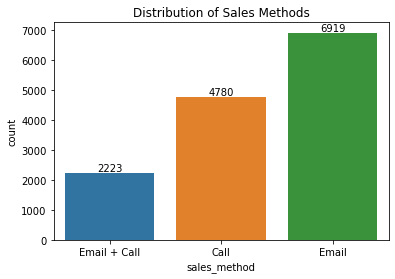

In [ ]:
# Create a bar chart to visualize the distribution of sales methods
ax = sns.countplot(x="sales_method", data=df)
plt.title("Distribution of Sales Methods")

# Add values on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), ha='center', va='bottom')


plt.show()


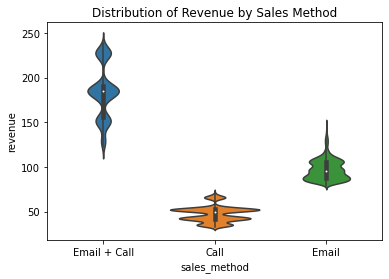

In [ ]:
# Create a violin plot to visualize the distribution of revenue
sns.violinplot(x="sales_method", y="revenue", data=df)
plt.title("Distribution of Revenue by Sales Method")
plt.show()


In [ ]:
import statistics
import numpy as np

# Group the data by sales method and calculate the median and IQR for revenue
grouped_data = df.groupby('sales_method')['revenue'].agg(
    [np.median, lambda x: np.percentile(x, 75) - np.percentile(x, 25)])
grouped_data.columns = ['Median', 'IQR']

# Print the median and IQR for each sales method
print(grouped_data)


# Create a function to print median, IQR, and modes of a variable

def print_stats(variable):
    median = statistics.median(variable)
    q1 = statistics.median(variable[:len(variable)//2])
    q3 = statistics.median(variable[(len(variable)+1)//2:])
    iqr = q3 - q1
    modes = statistics.multimode(variable)
    print("Median: ", median)
    print("IQR: ", iqr)
    print("Modes: ", modes)


# Print statistics for revenue by sales method
for method in df["sales_method"].unique():
    print(method)
    print_stats(df.loc[df["sales_method"] == method, "revenue"])


              Median     IQR
sales_method                
Call           49.05  11.210
Email          95.58  17.290
Email + Call  184.74  35.335
Email + Call
Median:  184.74
IQR:  -0.3199999999999932
Modes:  [186.57, 186.53, 187.11]
Call
Median:  49.05
IQR:  -3.405000000000001
Modes:  [51.86]
Email
Median:  95.58
IQR:  0.23000000000000398
Modes:  [98.42]


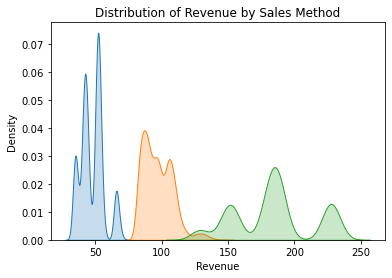

In [ ]:
import seaborn as sns

# Create a kernel density plot for each sales method
sns.kdeplot(df.loc[df['sales_method'] == 'Call',
                   'revenue'], shade=True, label='Call')
sns.kdeplot(df.loc[df['sales_method'] == 'Email',
                   'revenue'], shade=True, label='Email')
sns.kdeplot(df.loc[df['sales_method'] == 'Email + Call',
                   'revenue'], shade=True, label='Email + Call')

# Add labels and title
plt.xlabel('Revenue')
plt.ylabel('Density')
plt.title('Distribution of Revenue by Sales Method')

# Show the plot
plt.show()


In [ ]:
# Calculate the mean revenue for each sales method
mean_revenue_by_sales_method = df.groupby("sales_method")["revenue"].mean()
print(mean_revenue_by_sales_method)


sales_method
Call             47.596866
Email            97.128734
Email + Call    183.651233
Name: revenue, dtype: float64


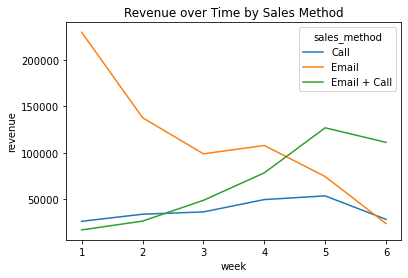

In [ ]:
# Group the data by week and sales method
grouped_data = df.groupby(['week', 'sales_method']).sum()[
    'revenue'].reset_index()

# Plot the revenue for each sales method over time
sns.lineplot(x='week', y='revenue', hue='sales_method', data=grouped_data)
plt.title("Revenue over Time by Sales Method")
plt.show()


In [ ]:
# Group the data by sales_method and week and calculate the number of unique customers and sum of nb_sold and revenue
df_grouped = df.groupby(['sales_method', 'week']).agg(
    {'customer_id': pd.Series.nunique, 'nb_sold': 'sum', 'revenue': 'sum'}).reset_index()

# Print the results for each sales_method
for method in df['sales_method'].unique():
    print("Sales method:", method)
    print(df_grouped[df_grouped['sales_method'] == method])
    print()


# Write the data to a CSV file
#df_grouped.to_csv('sales_data_grouped.csv', index=False)


Sales method: Email + Call
    sales_method  week  customer_id  nb_sold    revenue
12  Email + Call     1          131     1133   16885.33
13  Email + Call     2          171     1722   26376.23
14  Email + Call     3          324     3244   48737.14
15  Email + Call     4          433     5212   78296.20
16  Email + Call     5          676     8430  126809.72
17  Email + Call     6          488     7350  111152.07

Sales method: Call
  sales_method  week  customer_id  nb_sold   revenue
0         Call     1          740     5239  26159.18
1         Call     2          775     6823  33792.02
2         Call     3          868     7177  36247.27
3         Call     4          963     9831  49543.52
4         Call     5         1007    10731  53518.11
5         Call     6          427     5613  28252.92

Sales method: Email
   sales_method  week  customer_id  nb_sold    revenue
6         Email     1         2625    22917  229680.06
7         Email     2         1375    13837  137692.94
8   

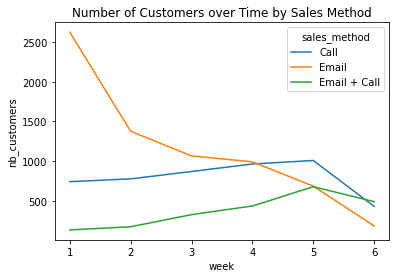

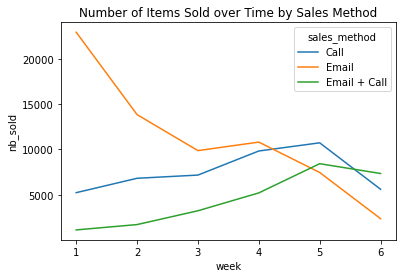

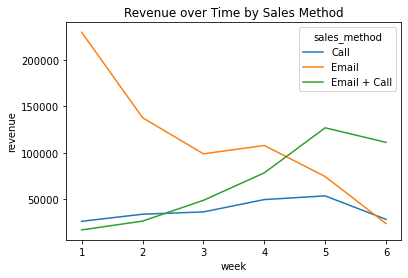

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of unique customer IDs for each week and sales method
customers_data = df.groupby(['week', 'sales_method'])['customer_id'].nunique().reset_index()
customers_data = customers_data.rename(columns={'customer_id': 'nb_customers'})

# Count the number of items sold for each week and sales method
items_data = df.groupby(['week', 'sales_method'])['nb_sold'].sum().reset_index()

# Group the data by week and sales method to calculate revenue
grouped_data = df.groupby(['week', 'sales_method']).sum().reset_index()

# Plot the number of customers for each sales method over time
sns.lineplot(x='week', y='nb_customers', hue='sales_method', data=customers_data)
plt.title("Number of Customers over Time by Sales Method")

# Plot the number of items sold for each sales method over time
plt.figure()
sns.lineplot(x='week', y='nb_sold', hue='sales_method', data=items_data)
plt.title("Number of Items Sold over Time by Sales Method")

# Plot the revenue generated for each sales method over time
plt.figure()
sns.lineplot(x='week', y='revenue', hue='sales_method', data=grouped_data)
plt.title("Revenue over Time by Sales Method")

plt.show()


### investigate how the sales method affects the number of units sold or revenue.

                nb_sold     revenue
sales_method                       
Call           9.500837   47.596866
Email          9.723081   97.128734
Email + Call  12.186685  183.651233


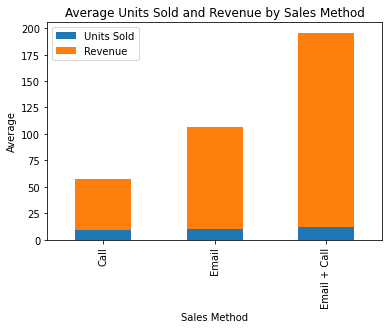

In [ ]:
sales_pivot = pd.pivot_table(df, values=['nb_sold', 'revenue'], index=['sales_method'], aggfunc=np.mean)
print(sales_pivot)

sales_pivot.plot(kind='bar', stacked=True)
plt.title('Average Units Sold and Revenue by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Average')
plt.legend(['Units Sold', 'Revenue'])
plt.show()


On average, the "Email + Call" sales method has the highest number of units sold and revenue, followed by "Email" and then "Call"

These results suggest that using a combination of email and call sales methods may be more effective in generating revenue compared to using only one of these methods

### exploring any possible relationships between the variables in the dataset.

                       week   nb_sold   revenue  years_as_customer  \
week               1.000000  0.806625  0.356257          -0.082096   
nb_sold            0.806625  1.000000  0.696188          -0.099056   
revenue            0.356257  0.696188  1.000000          -0.064882   
years_as_customer -0.082096 -0.099056 -0.064882           1.000000   
nb_site_visits     0.416439  0.487661  0.323142          -0.049260   

                   nb_site_visits  
week                     0.416439  
nb_sold                  0.487661  
revenue                  0.323142  
years_as_customer       -0.049260  
nb_site_visits           1.000000  


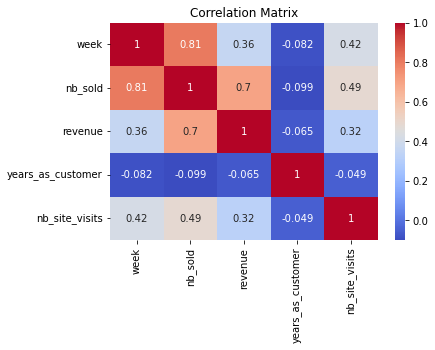

In [ ]:
# Create a correlation matrix
corr_matrix = df.corr()

print(corr_matrix)

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In the heatmap, the color and intensity of the square represent the degree and direction of the correlation between the variables. A positive correlation (values in the same direction) will be represented by colors that range from yellow to red, while a negative correlation (values in opposite directions) will be represented by colors that range from blue to purple.

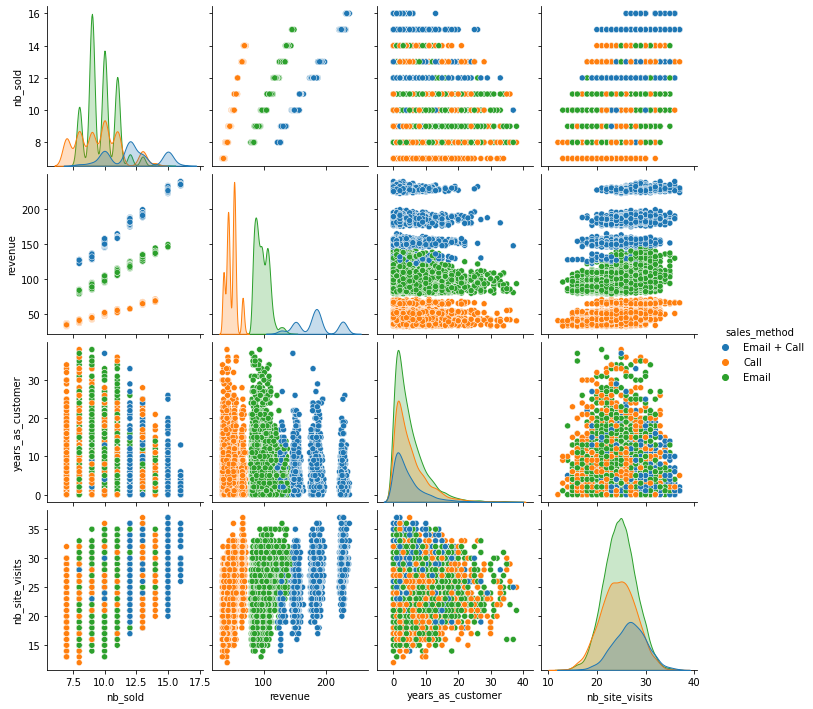

In [ ]:
sns.pairplot(df, vars=['nb_sold', 'revenue', 'years_as_customer', 'nb_site_visits'], hue='sales_method')


 perform a pairwise t-test to compare the mean values of the number of units sold and revenue for the different sales methods. 

In [ ]:
import scipy.stats as stats

# Get the data for the different sales methods
call_data = df[df['sales_method'] == 'Call']
email_data = df[df['sales_method'] == 'Email']
combo_data = df[df['sales_method'] == 'Email + Call']

# Perform pairwise t-tests
t_call_email, p_call_email = stats.ttest_ind(
    call_data['nb_sold'], email_data['nb_sold'])
t_call_combo, p_call_combo = stats.ttest_ind(
    call_data['nb_sold'], combo_data['nb_sold'])
t_email_combo, p_email_combo = stats.ttest_ind(
    email_data['nb_sold'], combo_data['nb_sold'])

# Print the results
print("Number of units sold:")
print("Call vs. Email: t = {:.3f}, p = {:.3f}".format(
    t_call_email, p_call_email))
print(
    "Call vs. Email + Call: t = {:.3f}, p = {:.3f}".format(t_call_combo, p_call_combo))
print(
    "Email vs. Email + Call: t = {:.3f}, p = {:.3f}".format(t_email_combo, p_email_combo))

t_call_email, p_call_email = stats.ttest_ind(
    call_data['revenue'], email_data['revenue'])
t_call_combo, p_call_combo = stats.ttest_ind(
    call_data['revenue'], combo_data['revenue'])
t_email_combo, p_email_combo = stats.ttest_ind(
    email_data['revenue'], combo_data['revenue'])

# Print the results
print("Revenue:")
print("Call vs. Email: t = {:.3f}, p = {:.3f}".format(
    t_call_email, p_call_email))
print(
    "Call vs. Email + Call: t = {:.3f}, p = {:.3f}".format(t_call_combo, p_call_combo))
print(
    "Email vs. Email + Call: t = {:.3f}, p = {:.3f}".format(t_email_combo, p_email_combo))


Number of units sold:
Call vs. Email: t = -8.253, p = 0.000
Call vs. Email + Call: t = -58.178, p = 0.000
Email vs. Email + Call: t = -72.162, p = 0.000
Revenue:
Call vs. Email: t = -257.452, p = 0.000
Call vs. Email + Call: t = -296.692, p = 0.000
Email vs. Email + Call: t = -204.631, p = 0.000


The output of the code shows the results of pairwise t-tests comparing the number of units sold and revenue between different sales methods.

The results indicate that there are significant differences in the number of units sold and revenue between different sales methods. Specifically, the p-values for all the t-tests are less than 0.05, which indicates that the differences are statistically significant.

Comparing call vs. email, call appears to be more effective in terms of the number of units sold and revenue. When call is used in addition to email, there is a significant increase in the effectiveness of the sales method.

In [ ]:
# Perform t-test for relationship between years_as_customer and num_units_sold
t_stat, p_val = stats.ttest_ind(
    df[df['years_as_customer'] > 0]['years_as_customer'], df[df['nb_sold'] > 0]['nb_sold'])
print(f"t = {t_stat}, p = {p_val}")


t = -100.80862913496809, p = 0.0


In [ ]:
# Perform t-test for relationship between number_of_site_visits and revenue
t_stat, p_val = stats.ttest_ind(df[df['nb_site_visits']>0]['nb_site_visits'], df[df['revenue']>0]['revenue'])
print(f"t = {t_stat}, p = {p_val}")


t = -171.12695352708133, p = 0.0


sales_method
Call            4780
Email           6919
Email + Call    2223
Name: customer_id, dtype: int64


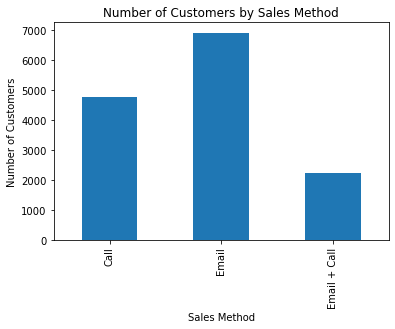

In [ ]:
# group the data by sales_method and count the unique customer_ids for each group
customers_by_method = df.groupby('sales_method')['customer_id'].nunique()

# print the results
print(customers_by_method)

# create a bar graph of the results
customers_by_method.plot(kind='bar')
plt.title('Number of Customers by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Number of Customers')
plt.show()
